### Logistic regression

###### 6/29/2021 John Park 
Logistic regression is a fantastic place to start for classification problems. It is also great to build up on our discussion about ordinary least square regression method. More importantly, it has shockingly close connection with deep neural networks (sigmoid function, recursive generalized linear model, backward propagation, updating weights). It is essential to understand logistic regression to further advance in machine learning. 

Logistic regression is one of the simpliest probablistic classifiers. It has bunch of advantages, and most important one is that the outcome does not get affected by collinearity of the indepdent variables, thus robust to correlated features, and therefore is suitable for large scale data analysis (Jurafsky, 2020). Whereas naive bayes is more suitable for smaller data set and is sensitive to collinearity of the features. However it is easy to implement and train the data. 

In this notebook, we will cover various topics arising from derivation and implementation of logistic regression. The topics include weighted linear regression, probability distribution, conditional probability, cross entropy loss, gradient decsent, probablistic classifier.   

I adapted codes from https://beckernick.github.io/logistic-regression-from-scratch/

References: 

Elements of statistical learning 

Speech and language Processing, Daniel Jurafsky, James W. Martin. 2020.

##### Conditional probability 

$$\hat y $$

$$ z=W^{T}X+b $$

$$ P(y=1 | X)= \sigma (W^{T}X+b)=1/[1+exp(-(W^{T}X+b)] $$

$$ P(y=0 | X)= 1-\sigma(z) =\sigma (-z)=1/[1+exp(W^{T}X+b)]$$

##### Maximum likelihood estimation of bernoulli distribution 
$$ L (\hat y,y) = y log\hat y +(1-y) log(1-\hat y) $$
###### Cross entropy Loss LCE derivation
$$-log(p(y| x)= -[ylong \hat y +(1-y)log(1-\hat y)]$$

###### Partial derivative of LCE $$ \frac{\partial L_{CE}}{\partial w_{j}}= [\sigma (w\dot x +b)-y]x_{j} $$

###### Equation for updating weight 

$$ W(n+1) = W(n) - \eta [ \sigma(W(n)^Tx+b-y)]X $$

###### How is gradient calculated? chain rule

In [1]:
import numpy as np
import pandas as pd
import math
import os
import sys
os.getcwd()

'C:\\Users\\vmlea\\Documents\\Work\\Essential-Math-for-ML\\Chap1-Linear-Regression'

In [5]:
def sigm(x):
    return 1 / (1 + np.exp(-x))
#assert sigm(0) == 0.5 #what is assert?


In [362]:
def log_likelihood(features, target, weights):
    scores = features.T@weights.T
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll


def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0]))
        features = np.vstack((intercept, features))
    #print(features.T)
    weights=[np.zeros(features.T.shape[1])]
    #print(weights.T)
    loglike=[]
    for step in range(num_steps):
        scores = features.T@weights[step].T
        #print(scores)
        predictions = sigm(scores)
        #print(predictions)
        #print(target)
        output_error_signal = target - predictions
        #print(output_error_signal)
        gradient = features@output_error_signal.T
        #print(gradient.T)
        #print(weights)
        weights.append(weights[step]+learning_rate * gradient.T)
        loglike.append(log_likelihood(features, target, weights[step]))
        # Print log-likelihood every so often
    
    return [weights,loglike]


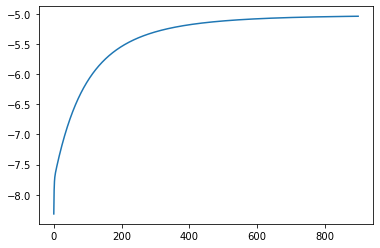

In [363]:
df=pd.read_csv('../data/examPF.csv')
x=np.array(df[df.columns[0]])
y=np.array(df[df.columns[1]])
weights,loglike = logistic_regression(features=x, target=y,
                     num_steps = 900, learning_rate = 0.01, add_intercept=True)
import matplotlib.pyplot as plt
plt.plot(loglike)

In [364]:
weights[900]

array([-3.48071834,  1.08489784])

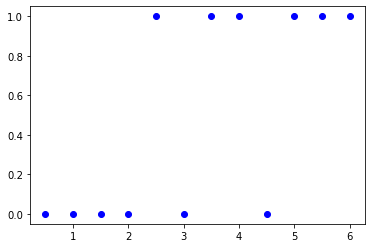

In [365]:
plt.plot(x,y,'bo')

In [366]:
t=np.linspace(0, 6, 100)
wt=sigm(weights[900][0]+weights[900][1]*t)

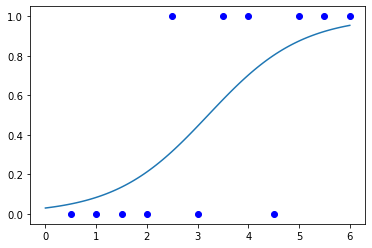

In [367]:
plt.plot(x,y,'bo')
plt.plot(t,wt)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 100

class1 = np.random.multivariate_normal([5, 8], [[1, .75],[.75, 1]], num_observations)
class2 = np.random.multivariate_normal([7, 12], [[1, .75],[.75, 1]], num_observations)

sim_features = np.vstack((class1, class2)).astype(np.float32)
sim_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))


In [75]:
def log_likelihood_mul(features, obs, weights):
    scores = np.dot(features, weights)
    ll = np.sum( obs*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression_mul(features, obs, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.concatenate((intercept, features), axis =1)      
    weights = np.zeros(features.shape[1])
    weights_all=[]
    loglike_all=[]
    
    for step in range(num_steps):
        AX_b = np.dot(features, weights)
        predictions = sigm(AX_b)
        # Gradient descent
        error = obs - predictions
        gradient = np.dot(features.T, error)
        weights_all.append(weights)
        weights = weights+learning_rate * gradient
        loglike=log_likelihood_mul(features, obs, weights)
        # Print log-likelihood every so often
        #if step % 10 == 0:
        #    print(loglike)    
        loglike_all.append(loglike)
    return [weights_all, loglike_all]

weights, loglike= logistic_regression_mul(sim_features, sim_labels,
                     num_steps = 1200, learning_rate = 0.01, add_intercept=True)


(5.0, 15.0)

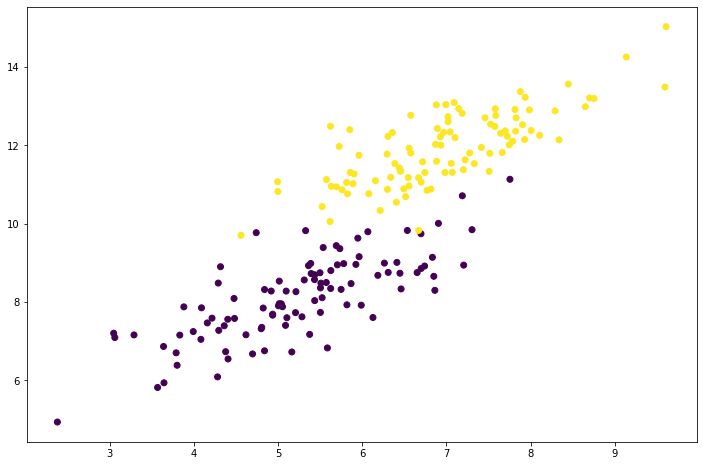

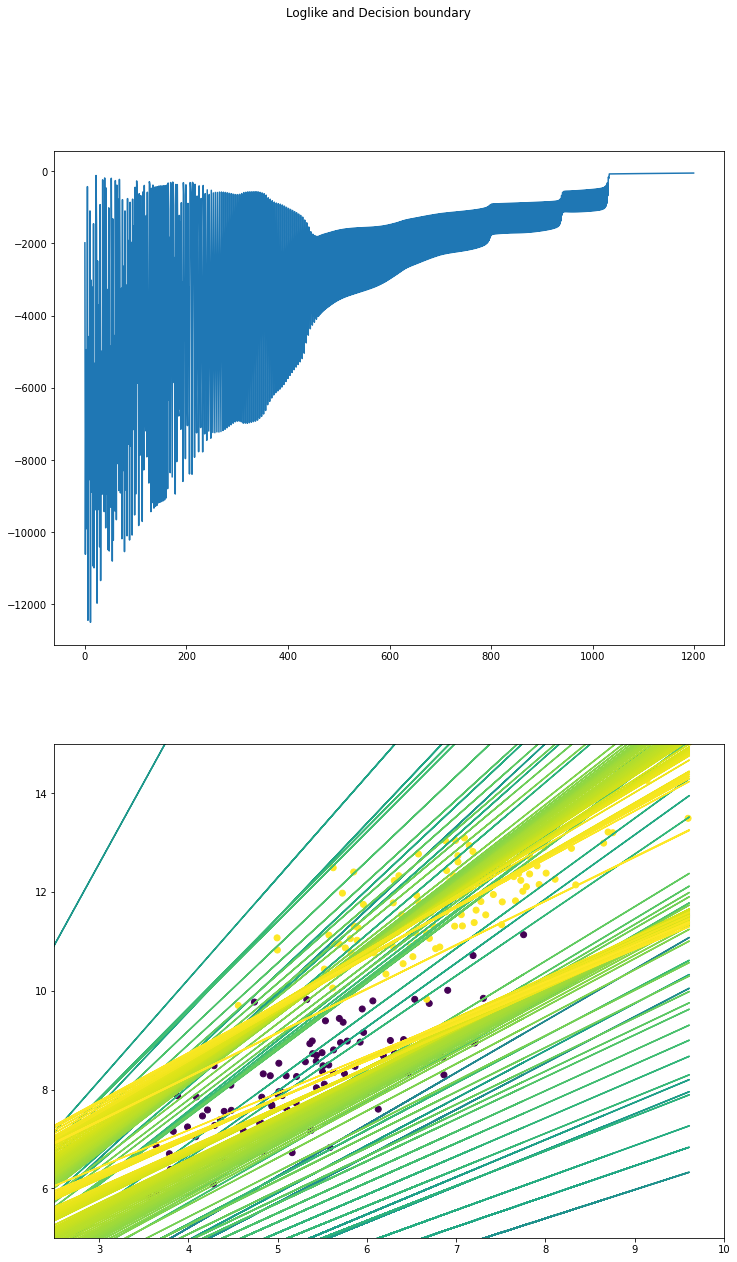

In [80]:
def Dbdry2D(x1,weights):
    Dbdry=(np.log(0.5)-weights[0]-weights[1]*x1)/weights[2]
    return Dbdry
x1=sim_features[:, 0]
x2=sim_features[:, 1]
Niter=len(weights)-1

plt.figure(figsize=(12,8))
plt.scatter(sim_features[:, 0], sim_features[:, 1],
            c = sim_labels)

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12,20))
fig.suptitle('Loglike and Decision boundary')
ax1.plot(loglike)
LineNum=150
import math 
K=math.trunc(Niter/LineNum)
for i in range(1,LineNum):
    
    line=Dbdry2D(x1,weights[K*i])
    nth=K*i
    ax2.plot(x1,line,label=nth)
    
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.sqrt(np.sqrt(np.linspace(0, 1,len(ax2.lines))))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
ax2.scatter(x1,x2 , c = sim_labels)
ax2.set_xlim([2.5, 10])
ax2.set_ylim([5, 15])

#ax2.legend(loc=2)
# How to add lengend expressing the number of iteration?


#### Questions and follow ups.

###### Maxent is logistic regression. Ecological niche modeling, species distribution modeling
###### How do you plot decision boundary to show the convergence of the loss - continuous fitting? Movie? or spectrum of lines?
###### Why vector and matrix are different to implement in funtion? I want to make the functions more simple. 
###### from 4.4.1. pp 120 in Elements of statistical learning, why is log likelihood np.sum( target*scores - np.log(1 + np.exp(scores)) )?
###### What is the difference using gradient descent (features*output_error_signal) vs newton's method?
###### How can we get the learning rate which gaurantee minimum iteration to arrive in global minima?

array([13, 65])

array([-8.23808622, -1.17768068,  1.55474291])

<ipython-input-45-2dd3fc8d5beb>:12: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  cm.register_cmap(name='alpha_gradient',


NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

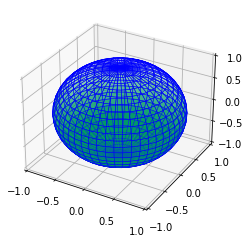

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# generate data for sphere
from numpy import pi,meshgrid,linspace,sin,cos
th,ph = meshgrid(linspace(0,pi,25),linspace(0,2*pi,51))
x,y,z = sin(th)*cos(ph),sin(th)*sin(ph),cos(th)

# define custom colormap with fixed colour and alpha gradient
# use simple linear interpolation in the entire scale
cm.register_cmap(name='alpha_gradient',
                 data={'red':   [(0.,0,0),
                                 (1.,0,0)],

                       'green': [(0.,0.6,0.6),
                                 (1.,0.6,0.6)],

                       'blue':  [(0.,0.4,0.4),
                                 (1.,0.4,0.4)],

                       'alpha': [(0.,1,1),
                                 (1.,0,0)]})

# plot sphere with custom colormap; constrain mapping to between |z|=0.7 for enhanced effect
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z,cmap='alpha_gradient',vmin=-0.7,vmax=0.7,rstride=1,cstride=1,linewidth=0.5,edgecolor='b')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_aspect('equal')

plt.show()

In [47]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
nc = NetCDFFile('C:/myfile1.nc')
nc1 = NetCDFFile('C:/myfile2.nc')
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
uwnd = nc.variables['uwnd'][:]
vwnd = nc1.variables['vwnd'][:]
map = Basemap(llcrnrlon=180.,llcrnrlat=0.,urcrnrlon=340.,urcrnrlat=80.)
lons,lats = np.meshgrid(lon,lat)
x,y = map(lons,lats)
speed = np.sqrt(uwnd*uwnd+vwnd*vwnd)
#speed = np.ma.masked_where(speed < 0.4, speed)
#cmap = plt.cm.jet
#cmap.set_bad(color='white')
levels = np.arange(0.0,3.0,0.1)
ticks = np.arange(0.0,3.0,0.2)
cs = map.contourf(x,y,speed[0],levels, cmap='jet')
vw = plt.quiver(x,y,speed)
cbar = plt.colorbar(cs, orientation='horizontal', cmap='jet', spacing='proportional',ticks=ticks)
cbar.set_label('850 mb Vector Wind Anomalies (m/s)')
map.drawcoastlines()
map.drawparallels(np.arange(20,80,20),labels=[1,1,0,0], linewidth=0.5)
map.drawmeridians(np.arange(200,340,20),labels=[0,0,0,1], linewidth=0.5)
#plt.show()
plt.savefig('phase8_850wind_anom.png',dpi=600)
#https://stackoverflow.com/questions/49367144/modify-matplotlib-colormap

ModuleNotFoundError: No module named 'netCDF4'

In [ ]:
#https://wxster.com/blog/2015/12/using-two-filled-contour-plots-simultaneously-in-matplotlib